In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ufo
欄位說明<br>
city : 發現地點<br>
color reported : 發現時顏色<br>
shape reported : 發現時形狀<br>
state : 發現州別<br>
time : 發現時間


In [2]:
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.shape

(18241, 5)

In [3]:
ufo.head(10)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


#### 大多數的不明飛行物體發生在哪裡?

In [4]:
ufo_state = ufo.groupby("State").count()

In [5]:
ufo_state.sort_values("Time", ascending=False, inplace=True)

#### UFO 10 大州!!

In [6]:
ufo_rank = ufo_state.sort_values("Time", ascending=False)

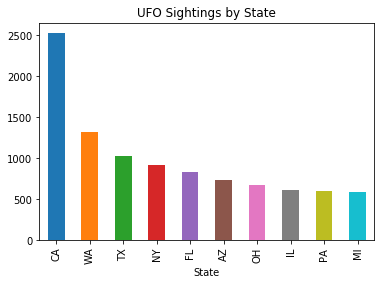

In [7]:
ufo_rank[:10].Time.plot(kind='bar', title='UFO Sightings by State')

#### 歷年觀測到UFO的次數

In [31]:
ufo_date = pd.to_datetime(ufo.Time, format='%m/%d/%Y %H:%M')
ufo_yr = ufo_date.dt.year  # series with the year exclusively

## Set axes ##
years_data = ufo_yr.value_counts()
years_index = years_data.index  # x ticks
years_values = years_data.get_values()
years_values

array([2774, 2635, 1743, 1344, 1237,  851,  406,  326,  312,  292,  281,
        261,  258,  247,  245,  244,  237,  237,  232,  227,  220,  218,
        211,  210,  203,  196,  195,  186,  186,  177,  175,  162,  154,
        148,  138,  118,  101,   85,   78,   72,   67,   57,   55,   53,
         52,   50,   46,   41,   36,   33,   31,   21,   19,    9,    9,
          8,    8,    5,    3,    3,    2,    2,    2,    2,    2,    1,
          1,    1], dtype=int64)

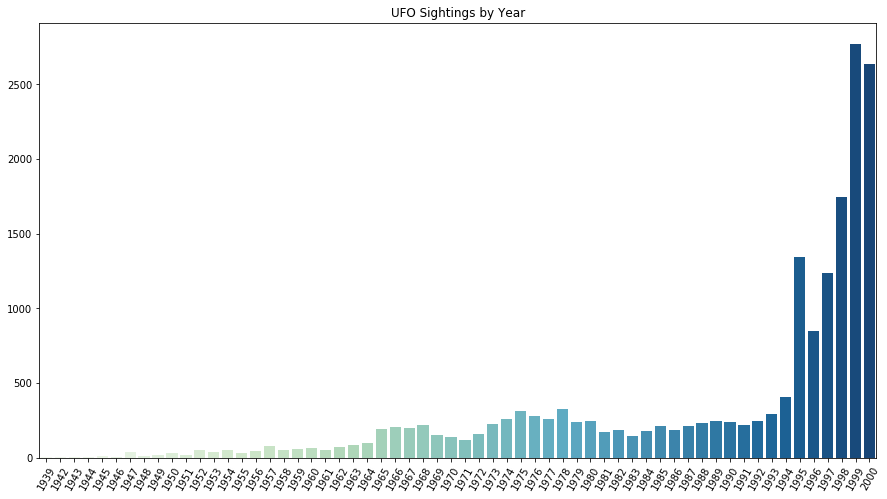

In [32]:
## Create Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "GnBu")

#### 一年之中最容易發現不明飛行物體的時間點為何?

In [9]:
# Add Season Column to ufo_date #
# Given a datetime, return the season that it's in #
ufo_datem = ufo_date.dt.month
spring = range(3,6)
summer = range(6,9)
fall = range(9,12)
seasons = []

for st_date in ufo_datem:
    # Conversion Process # 
    if st_date in spring:
        seasons.append('Spring')
    elif st_date in summer:
        seasons.append('Summer')
    elif st_date in fall:
        seasons.append('Fall')
    else:
        seasons.append('Winter')

In [10]:
ufo['season'] = pd.Series(seasons, index=ufo.index)

In [11]:
ufo['season'].value_counts()

Summer    7352
Fall      4867
Spring    3309
Winter    2713
Name: season, dtype: int64

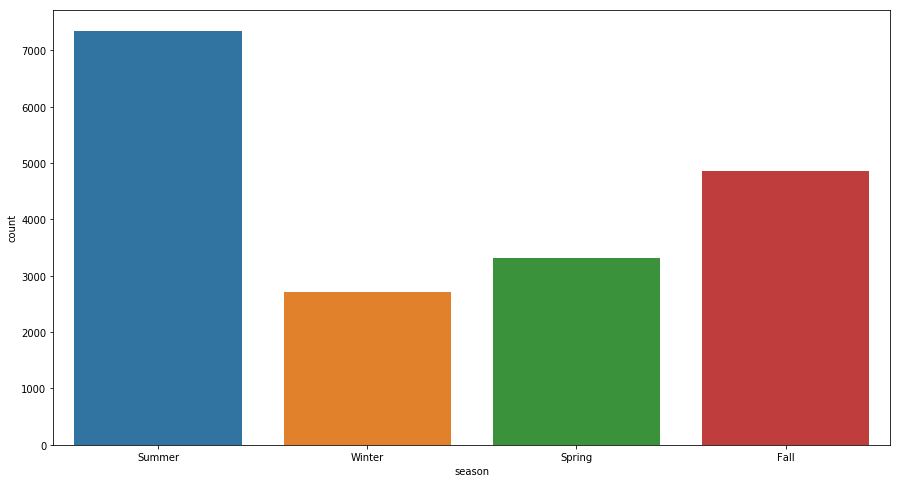

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='season', data=ufo)

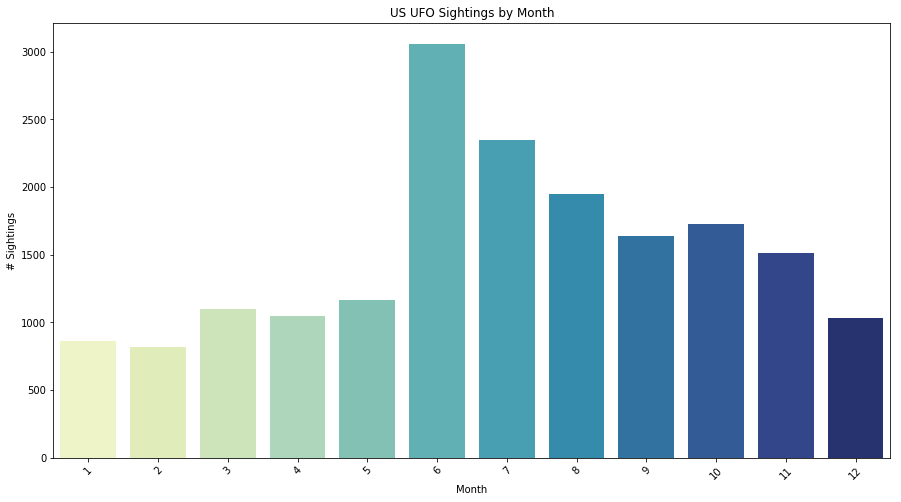

In [13]:
m_cts = (ufo_date.dt.month.value_counts()).sort_index()
m_ctsx = m_cts.index
m_ctsy = m_cts.get_values()
f, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=m_ctsx, y=m_ctsy, palette="YlGnBu")
ax.set_title('US UFO Sightings by Month')
ax.set_xlabel('Month')
ax.set_ylabel('# Sightings')
plt.xticks(rotation=45)
plt.show()

### [練習] 最常紀錄到不明飛行物體的形狀及顏色為何?

In [29]:
ufo_color = ufo.groupby("Colors Reported").State.count()
ufo_color.sort_values(ascending = False)

Colors Reported
RED                       780
GREEN                     531
ORANGE                    528
BLUE                      450
YELLOW                    169
RED GREEN                  89
RED BLUE                   78
RED ORANGE                 44
GREEN BLUE                 34
RED GREEN BLUE             33
ORANGE YELLOW              26
RED YELLOW                 25
ORANGE GREEN               23
YELLOW GREEN               17
ORANGE BLUE                10
RED YELLOW GREEN            9
YELLOW BLUE                 6
YELLOW GREEN BLUE           5
ORANGE GREEN BLUE           5
RED ORANGE YELLOW           4
RED YELLOW GREEN BLUE       4
RED ORANGE GREEN            3
RED ORANGE BLUE             3
RED YELLOW BLUE             3
ORANGE YELLOW GREEN         1
RED ORANGE YELLOW BLUE      1
ORANGE YELLOW BLUE          1
Name: State, dtype: int64

In [30]:
ufo_Shape = ufo.groupby("Shape Reported").State.count()
ufo_Shape.sort_values(ascending = False)

Shape Reported
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
DOME            1
HEXAGON         1
PYRAMID         1
FLARE           1
Name: State, dtype: int64